## Install required libraries


In [1062]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import  GridSearchCV
import xgboost as xgb

## The dataset

In [991]:
data = pd.read_csv("C:\\Users\Mokshda Sharma\Desktop\My Projects\EDA_hotel_booking\hotel_booking.csv\hotel_booking.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\4012888115.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("C:\\Users\Mokshda Sharma\Desktop\My Projects\EDA_hotel_booking\hotel_booking.csv\hotel_booking.csv")


## About Dataset

Each Row in our dataset contains information for a particular instance of booking. Now Let's explain what every column in our dataset contains.

 1.  hotel - Hotel Name 
 2.   is_canceled - If a booking was canceled or not. 
*   0 - Booking was not cancelled.
*   1 - Booking was cancelled.


 3.   lead_time - Waiting time(in days) between the time of booking and time of arrival.
 4.   arrival_date_year - Year of arrival.
 5.   arrival_date_month - Month of arrival.
 6.   arrival_date_week_number - Week number of arrival.          
 7.   arrival_date_day_of_month - Day number of arrival.        
 8.   stays_in_weekend_nights - No. of weekend nights that the customer stayed for.           
 9.   stays_in_week_nights - No. of week nights that the customer stayed for.              
 10.   adults - No. of adults staying.
 11.  children - No. of children staying. 
 12.  babies - No. of babies staying.
 13.  meal - Meal type chosen by the customer. 
*   SC - Self catering.(No meals included)
*   BB - Bed and Breakfast
*   HB - Half Board(Breakfast and Lunch/ Breakfast and Dinner)
*   FB - Full Board(Breakfast + Lunch + Dinner)


 14.  country - Country of origin of the customer.
 15.  market_segment - Market segment to which customer belongs.
 16.  distribution_channel - Distribution channel through which booking was made. 
 17.  is_repeated_guest - Whether or not a customer has stayed in the same hotel before. 
*   0 - Not a repeated guest
*   1 - A repeated guest(Has stayed in the same hotel before)

 18.  previous_cancellations - Previous cancellations made by the customer.         
 19.  previous_bookings_not_canceled - Previous bookings that haven't been canceled.
 20.  reserved_room_type - Type of the room reserved.  
 21.  assigned_room_type - Type of the room assigned.            
 22.  booking_changes - No. of booking changes made.
 23.  deposit_type - Type of deposit made.
 24.  agent - Unique ID of Agent through which booking is made.
 25.  company -  Unique ID of Company through which booking was made.
 26.  days_in_waiting_list - number of days spent on the waiting list by customer.
 27.  customer_type - Type of customer.
 28.  adr - Average daily rate.
 29.  required_car_parking_spaces - No. of car parking spaces required by the customer.     
 30.  total_of_special_requests - Total number of special requests made by the customers.        
 31.  reservation_status - Status of reservation.              
 32.  reservation_status_date - Date of change in reservation status.


## Preprocessing

In [992]:
pd.set_option('display.max.columns', None)

In [993]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [994]:
data.duplicated().sum()

0

In [995]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [996]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [997]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [998]:
cols = ['hotel','is_canceled','lead_time','arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 
       'stays_in_weekend_nights', 'stays_in_week_nights',
        'adults', 'children', 'babies',
        'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled',  'booking_changes',
       'deposit_type',  'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']

## Creating a new dataframe

In [999]:
df = data[cols]

In [1000]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

## Finding outliers

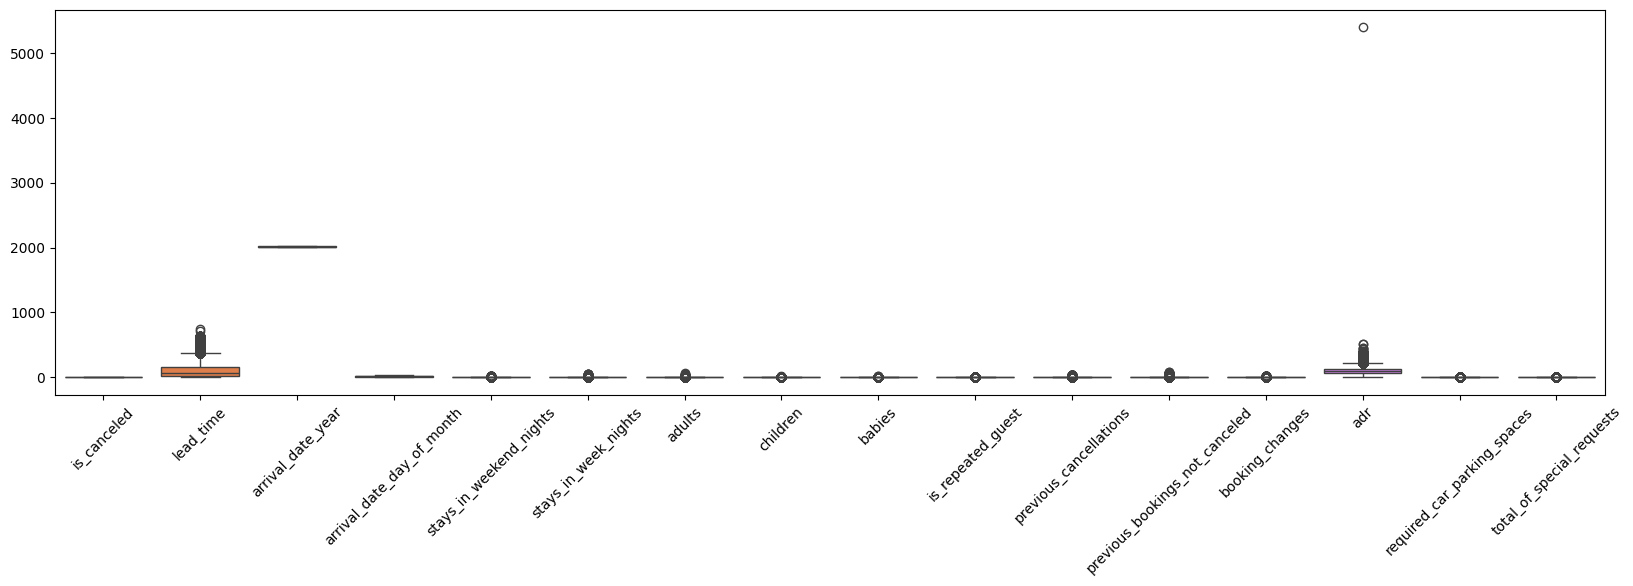

In [1001]:
plt.figure(figsize=(20, 5))
#to check the outliers
sns.boxplot(data=df)
# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

## Treating Outliers

In [1002]:
a=df[['adr','lead_time']].quantile(0.25)
b=df[['adr','lead_time']].quantile(0.75)
IQR=b-a
outliers = ((df[['adr','lead_time']] < (a - 1.5 * IQR)) | df[['adr','lead_time']] > (b + 1.5 * IQR))
outliers

,adr,lead_time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
119385,False,False
119386,False,False
119387,False,False
119388,False,False


In [1003]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [1004]:
df['children'] = df['children'].fillna(0)

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\3799106231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].fillna(0)


In [1005]:
df['children'] = df['children'].astype(int)
df['adr'] = df['adr'].astype(int)

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2404724409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].astype(int)
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2404724409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adr'] = df['adr'].astype(int)


In [1006]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,0,Direct,Direct,0,0,0,3,No Deposit,Transient,0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,0,Direct,Direct,0,0,0,4,No Deposit,Transient,0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,0,Direct,Direct,0,0,0,0,No Deposit,Transient,75,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,0,Corporate,Corporate,0,0,0,0,No Deposit,Transient,75,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,0,Online TA,TA/TO,0,0,0,0,No Deposit,Transient,98,0,1,Check-Out


## Trend between cancellation status and adults

In [1007]:

# plt.figure(figsize=(10, 6))
# temp = df[['adults','is_canceled']].value_counts().reset_index()
# # sns.scatterplot(data=df, x='adults', y='is_canceled', alpha=0.5)

# # # Adding titles and labels
# # plt.title('Trend between Cancellation and Number of Adults')
# # plt.xlabel('Number of Adults')
# # plt.ylabel('Is Canceled (0 = No, 1 = Yes)')

# # plt.show()
# temp

# # plots = counts.plot(kind='h',  color = ['salmon', 'mediumorchid'] , figsize=(10, 5) )
# # plt.show()

In [1008]:
# counts = df.groupby(['adults', 'is_canceled']).size().unstack(fill_value=0)
# counts.plot.bar()

## Binning the dates ("arrival_date_day_of_month") column

In [1009]:
binns = [0, 10, 20, 31]
grp =  ['0-10','10-20','20-31']
binned_data = pd.cut(df['arrival_date_day_of_month'], binns, labels = grp, include_lowest= True)
binned_data.value_counts().sort_index()

arrival_date_day_of_month
0-10     38706
10-20    40016
20-31    40668
Name: count, dtype: int64

## Creating a new column that consists of total nights

In [1010]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2670578072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']


## Clubbing week nights

In [1011]:
value_counts = df['stays_in_week_nights'].value_counts()

# Identify values to be replaced with 'others'
values_to_replace = value_counts[value_counts < 7000].index

# Replace the values
df['stays_in_week_nights'] = df['stays_in_week_nights'].replace(values_to_replace, 'others')

# View the modified DataFrame
# print(df['stays_in_week_nights'])
df['stays_in_week_nights'].value_counts()

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2395955611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stays_in_week_nights'] = df['stays_in_week_nights'].replace(values_to_replace, 'others')


stays_in_week_nights
2         33684
1         30310
3         22258
5         11077
4          9563
0          7645
others     4853
Name: count, dtype: int64

## Clubbing weekend nights

In [1012]:
df['stays_in_weekend_nights'].value_counts().head()

stays_in_weekend_nights
0    51998
2    33308
1    30626
4     1855
3     1259
Name: count, dtype: int64

In [1013]:
value_counts = df['stays_in_weekend_nights'].value_counts()

# Identify values to be replaced with 'others'
values_to_replace = value_counts[value_counts < 1000].index

# Replace the values
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].replace(values_to_replace, 'others')

# View the modified DataFrame
# print(df['stays_in_week_nights'])
df['stays_in_weekend_nights'].value_counts()

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2872912693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].replace(values_to_replace, 'others')


stays_in_weekend_nights
0         51998
2         33308
1         30626
4          1855
3          1259
others      344
Name: count, dtype: int64

## Seasonality in Cancellation

In [1014]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming df is your dataframe and it contains 'arrival_date_month' and 'arrival_date_year'
# # Create a new column 'arrival_date' for aggregation
# df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-01')

# # Aggregate data by month and year
# monthly_data = df.groupby('arrival_date').size().reset_index(name='arrivals')

# # Set 'arrival_date' as index
# monthly_data.set_index('arrival_date', inplace=True)

# # Plot the aggregated data
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_data['arrivals'])
# plt.title('Monthly Arrivals',weight = 'bold')
# plt.xlabel('Date (Year)',weight = 'bold')
# plt.ylabel('Number of Arrivals',weight = 'bold')
# plt.show()

# # Decompose the time series
# result = seasonal_decompose(monthly_data['arrivals'], model='additive', period=12)

# # Plot the decomposition
# result.plot()
# plt.show()

## Year wise hotel cancellation trend

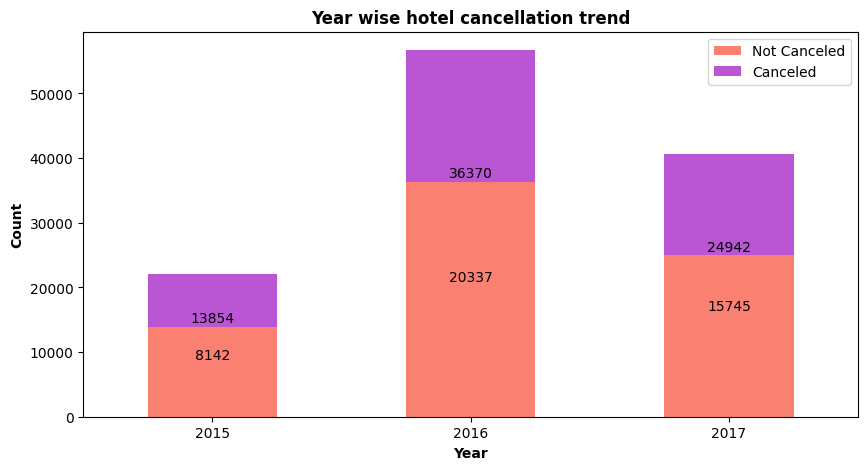

In [1015]:
counts = df.groupby(['arrival_date_year', 'is_canceled']).size().unstack(fill_value=0)

# Plotting the histogram
plots = counts.plot(kind='bar', stacked=True,  color = ['salmon', 'mediumorchid'] , figsize=(10, 5) )
plt.title('Year wise hotel cancellation trend', weight = 'bold')
plt.xlabel('Year', weight = 'bold')
plt.ylabel('Count', weight = 'bold')
plt.xticks(rotation=0)
plt.legend(['Not Canceled', 'Canceled'], loc='upper right')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\3540703947.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\3540703947.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonality_trend = df.groupby(['arrival_date_year', 'arrival_date_month', 'is_canceled']).size().reset_index(name='count')


<Figure size 2000x800 with 0 Axes>

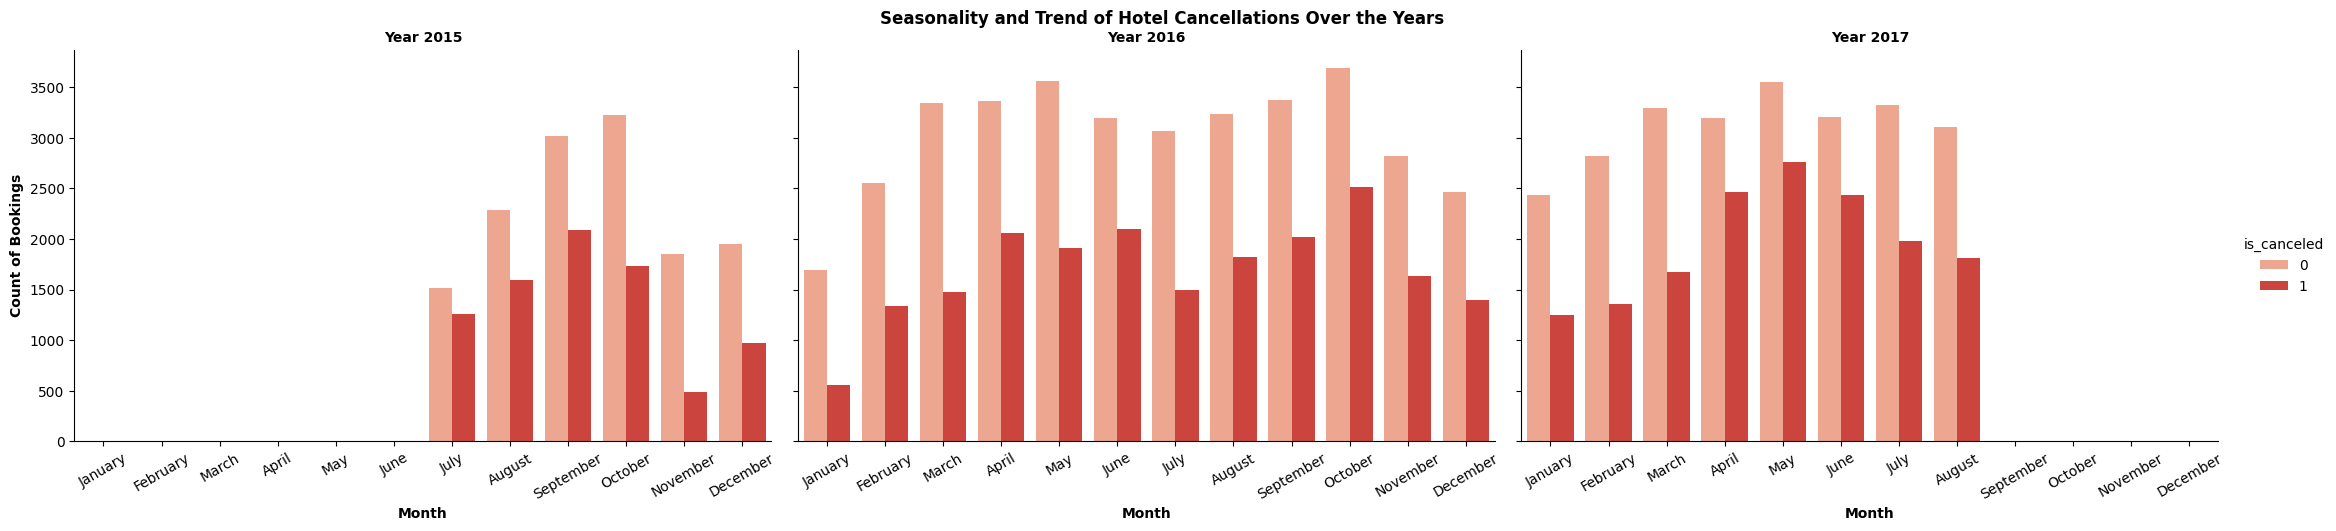

In [1016]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the defined order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Grouping the data by year and month to get the count of cancellations and non-cancellations
seasonality_trend = df.groupby(['arrival_date_year', 'arrival_date_month', 'is_canceled']).size().reset_index(name='count')

# Plotting the data using seaborn
plt.figure(figsize=(20, 8))
plots = sns.catplot(
    x='arrival_date_month', 
    y='count', 
    hue='is_canceled', 
    col='arrival_date_year', 
    data=seasonality_trend, 
    kind='bar', 
    palette='Reds',
    height=5, 
    aspect=1.5
)

# Adding titles and labels
plots.fig.suptitle('Seasonality and Trend of Hotel Cancellations Over the Years', weight='bold')
plots.set_axis_labels('Month', 'Count of Bookings', weight='bold')
plots.set_titles('Year {col_name}', weight='bold')
plots.fig.subplots_adjust(top=0.9)
plots.set_xticklabels(rotation = 30)

# Display the plot
plt.show()


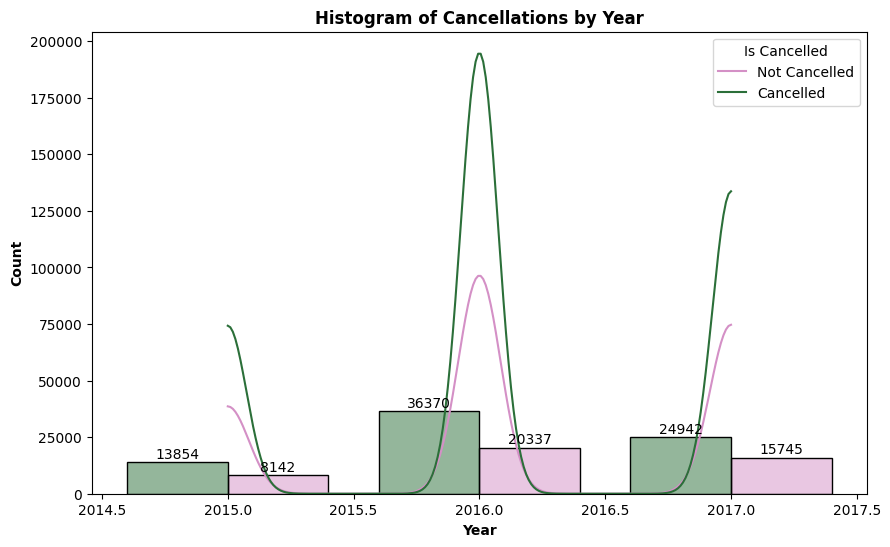

In [1017]:
plt.figure(figsize=(10, 6))
plots = sns.histplot(data=df, x='arrival_date_year', hue='is_canceled', multiple='dodge', shrink=0.8, discrete=True, kde= True, palette = 'cubehelix')
plt.title('Histogram of Cancellations by Year',weight = 'bold')
plt.xlabel('Year',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.legend(title='Is Cancelled', labels=['Not Cancelled', 'Cancelled'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

## Month-wise  hotel cancellation trend

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2241317674.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)


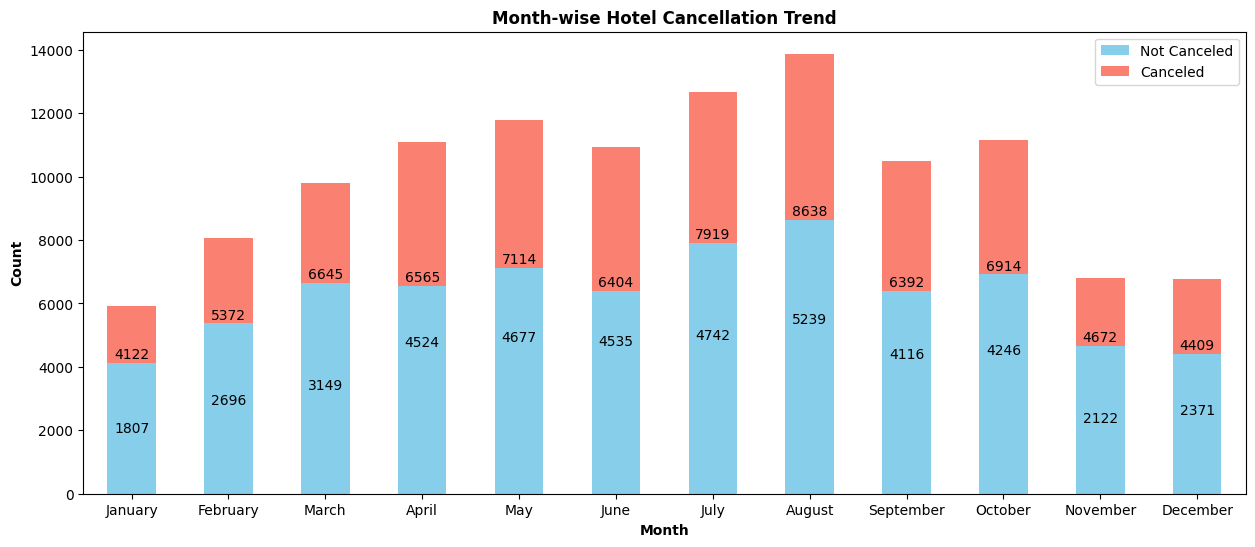

In [1018]:

# Group by 'arrival_date_month' and 'is_canceled'
counts = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to categorical with defined order
counts = counts.reindex(month_order, axis=0)

# Plotting the histogram
plots = counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(15, 6))
plt.title('Month-wise Hotel Cancellation Trend', weight='bold')
plt.xlabel('Month', weight='bold')
plt.ylabel('Count', weight='bold')
plt.xticks(rotation=0)
plt.legend(['Not Canceled', 'Canceled'], loc='upper right')

# Annotate the bars with counts
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=10, xytext=(0, 6), textcoords='offset points')

plt.show()


C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\3985134852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\3985134852.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_percentages = df.groupby('arrival_date_month')['is_canceled'].mean() * 100


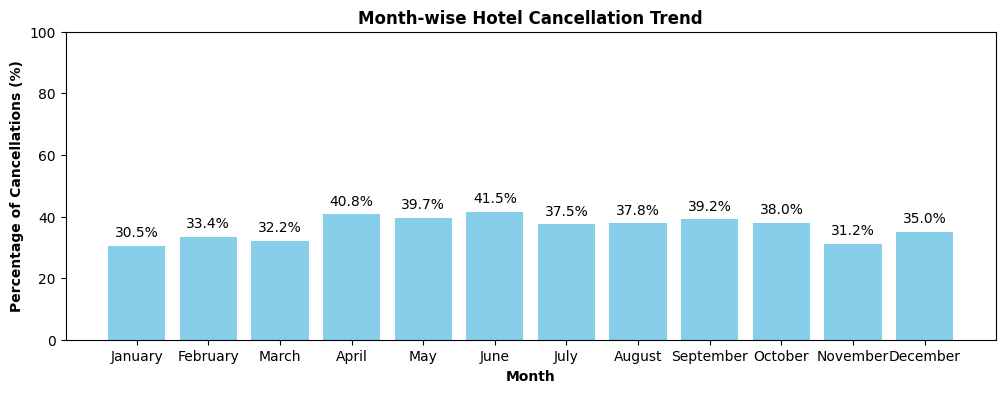

In [1019]:

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the defined order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Calculate the cancellation percentages
cancellation_percentages = df.groupby('arrival_date_month')['is_canceled'].mean() * 100

# Plotting the histogram
plt.figure(figsize=(12, 4))
bars = plt.bar(cancellation_percentages.index, cancellation_percentages.values, color='skyblue')

# Adding labels and titles
plt.title('Month-wise Hotel Cancellation Trend', weight='bold')
plt.xlabel('Month', weight='bold')
plt.ylabel('Percentage of Cancellations (%)', weight='bold')
plt.ylim(0, 100)

# Adding percentage labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()


## Bivariate Analysis of Week Nights and Cancellation Status

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2072814126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stays_in_week_nights'] = df['stays_in_week_nights'].astype(str)


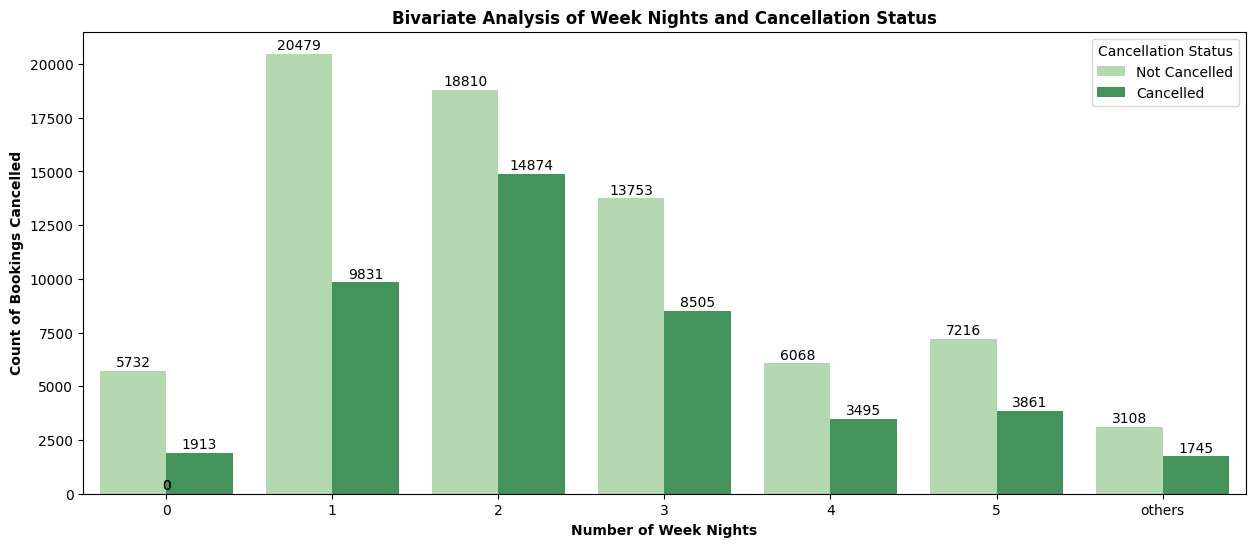

In [1020]:
df['stays_in_week_nights'] = df['stays_in_week_nights'].astype(str)

# Plot the data
plt.figure(figsize=(15, 6))
plots = sns.countplot(x='stays_in_week_nights', hue='is_canceled', data=df , palette='Greens')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 6),textcoords='offset points')
plt.title('Bivariate Analysis of Week Nights and Cancellation Status', weight = 'bold')
plt.xlabel('Number of Week Nights', weight = 'bold')
plt.ylabel('Count of Bookings Cancelled', weight = 'bold')
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

## Bivariate Analysis of Weekend Nights and Cancellation Status

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2446290796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(str)
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2446290796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(str)


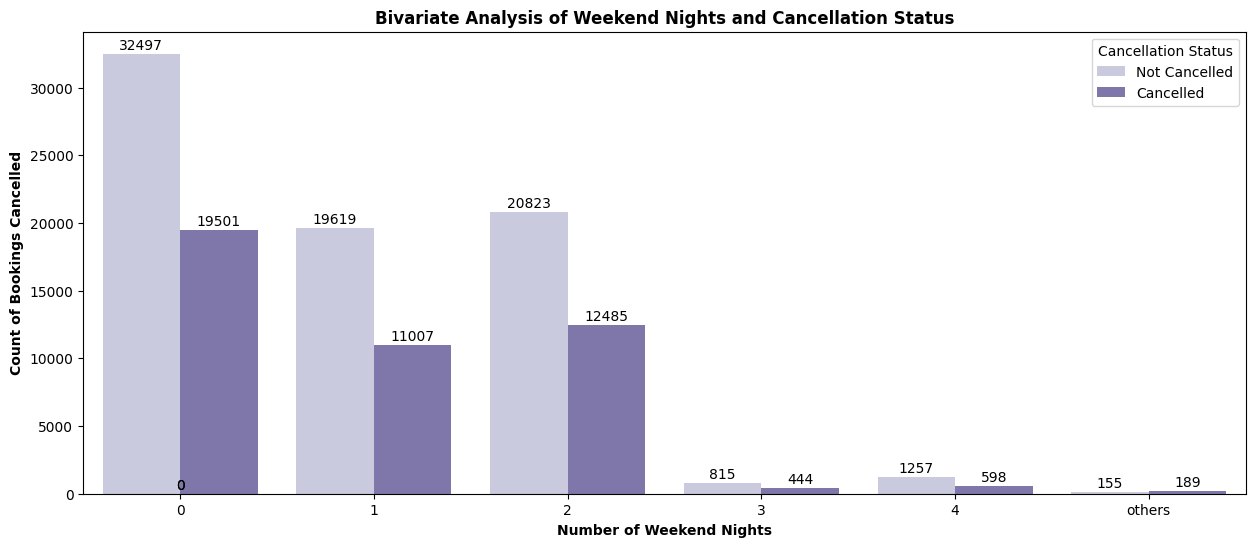

In [1021]:

df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(str)

# Sort the values and convert to string
sorted_weekend_nights = sorted(df['stays_in_weekend_nights'].unique())
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(str)

# Set the order for the categorical plot
order = [str(x) for x in sorted_weekend_nights]

# Plot the data
plt.figure(figsize=(15, 6))
plots = sns.countplot(x='stays_in_weekend_nights', hue='is_canceled', data=df, order=order, palette='Purples')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', size=10, xytext=(0, 6), 
                   textcoords='offset points')

plt.title('Bivariate Analysis of Weekend Nights and Cancellation Status', weight='bold')
plt.xlabel('Number of Weekend Nights', weight='bold')
plt.ylabel('Count of Bookings Cancelled', weight='bold')
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()


## Analysis of Month in each year

Text(0, 0.5, 'Count')

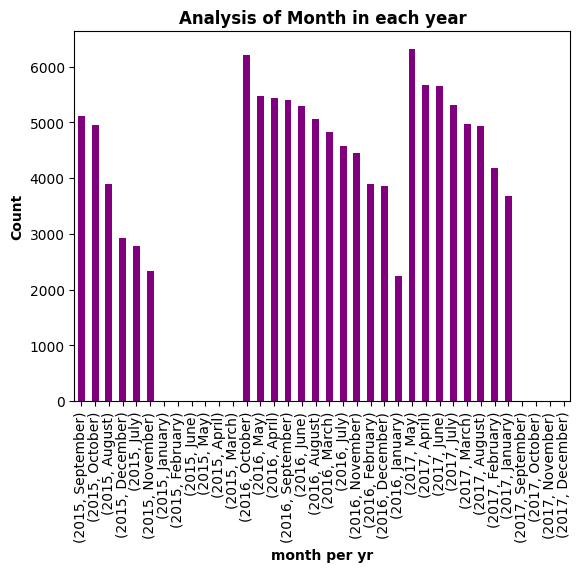

In [1022]:
x = df.groupby('arrival_date_year')['arrival_date_month'].value_counts()
x.plot(kind= 'bar', color = 'purple')
plt.title('Analysis of Month in each year', weight = 'bold')
plt.xlabel('month per yr', weight = 'bold')
plt.ylabel('Count', weight = 'bold')

## Percentage of Cancellations and Non-Cancellations

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\2413373202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


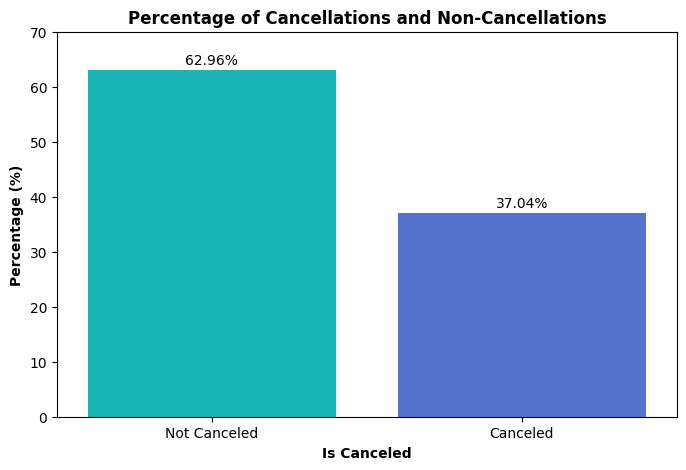

In [1023]:
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations', weight = 'bold')
plt.xlabel('Is Canceled', weight = 'bold')
plt.ylabel('Percentage (%)', weight = 'bold')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

## Heatmap to show correlation

<Axes: >

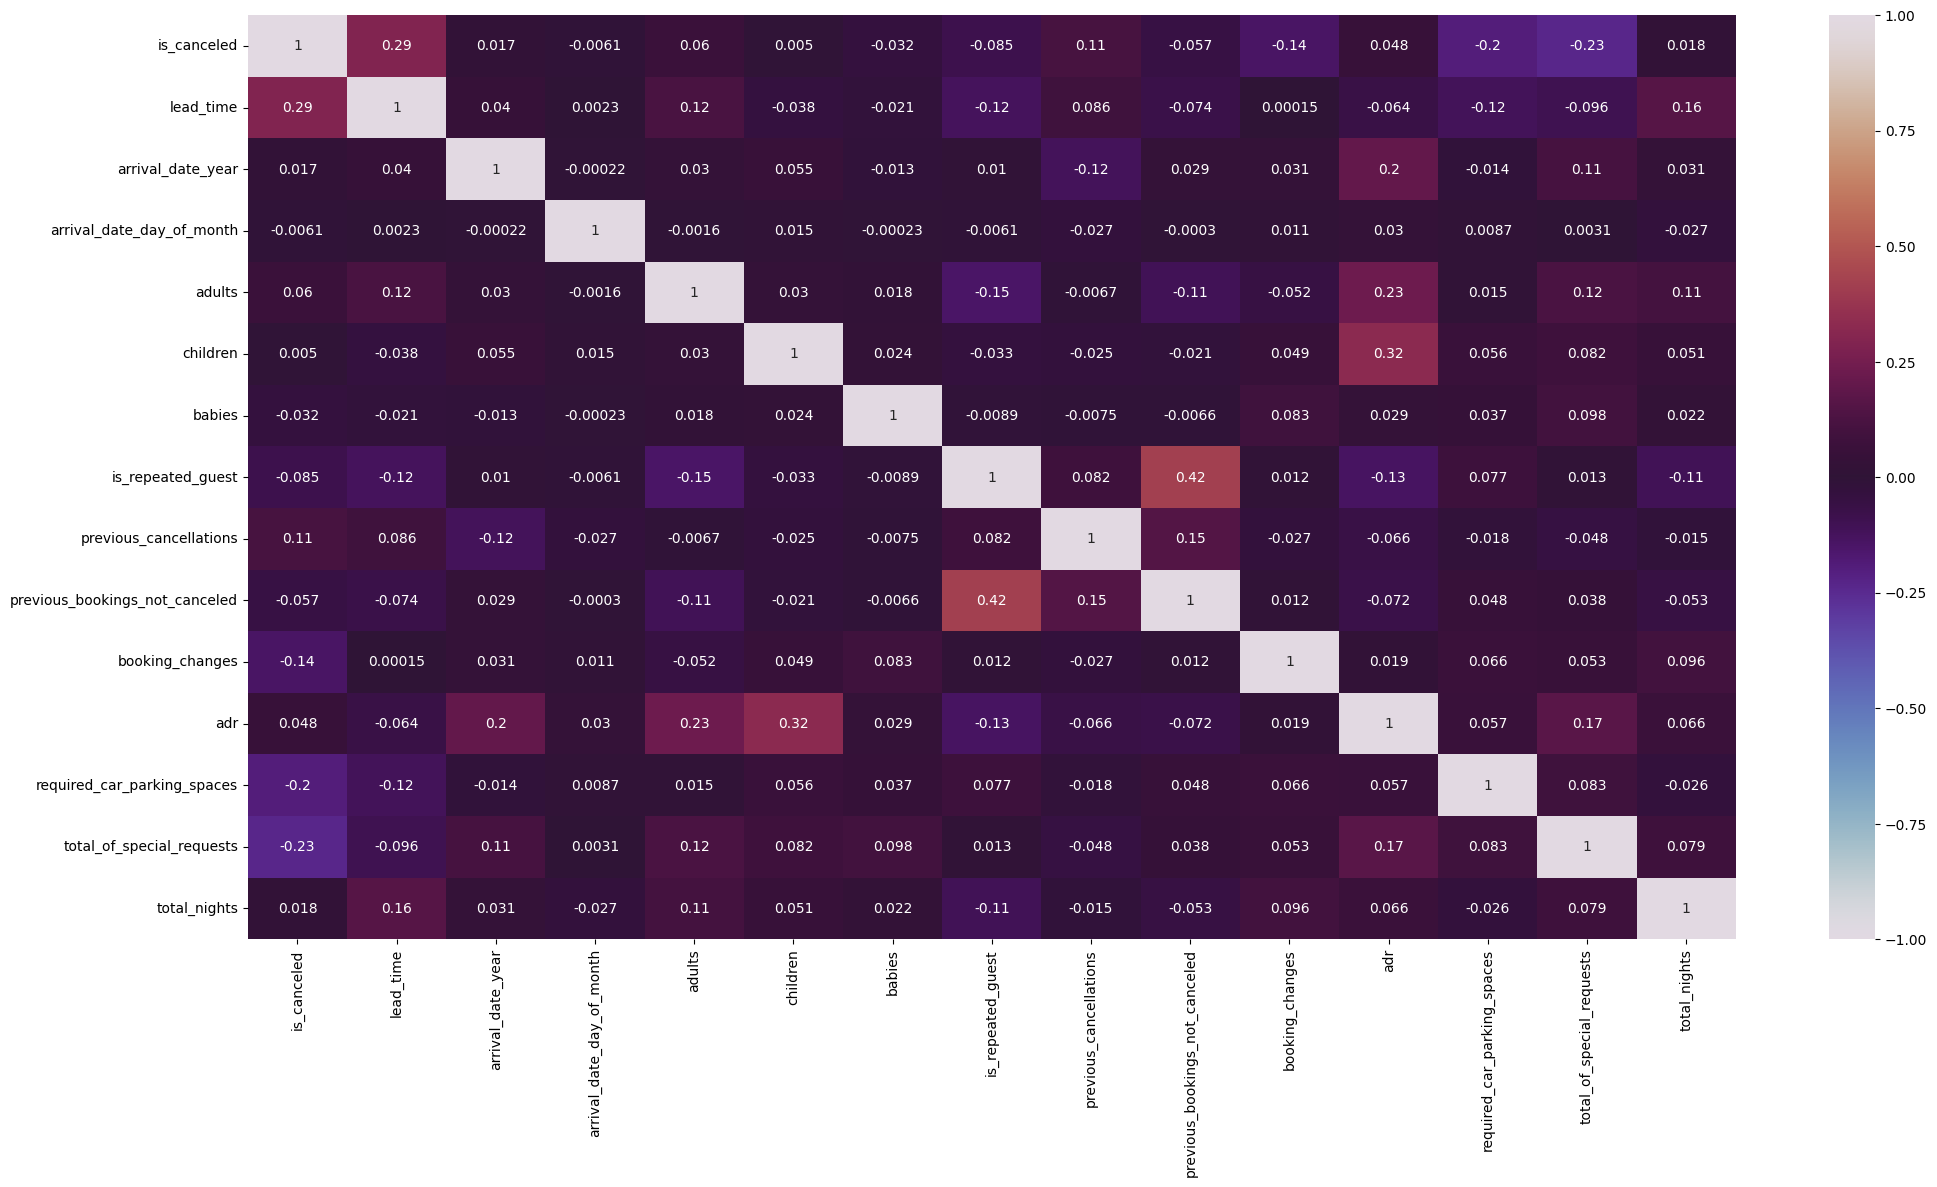

In [1024]:
# Representing the correlation amongst all the numerical columns using a heatmap.
heatmap_data = df.select_dtypes(include=['number']).corr()

# Now we plot it.
plt.figure(figsize=(24,12))
sns.heatmap(heatmap_data, vmin=-1, cmap='twilight', annot=True)

## Editing dataset

In [1025]:
# df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) )
# df

## Perfroming Label encoding 

In [1026]:
labelEncoder_X = LabelEncoder()
df['hotel'] = labelEncoder_X.fit_transform(df['hotel'])
df['arrival_date_month'] = labelEncoder_X.fit_transform(df['arrival_date_month'])
df['market_segment'] = labelEncoder_X.fit_transform(df['market_segment'])
df['distribution_channel'] = labelEncoder_X.fit_transform(df['distribution_channel'])
df['deposit_type'] = labelEncoder_X.fit_transform(df['deposit_type'])
df['customer_type'] = labelEncoder_X.fit_transform(df['customer_type'])
df['reservation_status'] = labelEncoder_X.fit_transform(df['reservation_status'])
# df['arrival_date'] = labelEncoder_X.fit_transform(df['arrival_date'])

C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\1092656318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotel'] = labelEncoder_X.fit_transform(df['hotel'])
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\1092656318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month'] = labelEncoder_X.fit_transform(df['arrival_date_month'])
C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_7484\1092656318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

## Perfroming One-Hot encoding 

In [1027]:
# df = pd.get_dummies(df, columns=['stays_in_week_nights'], 
#                             prefix= ['stays_in_week_nights']).astype(int)

In [1028]:
df = pd.get_dummies(df, columns=['stays_in_week_nights','stays_in_weekend_nights'], 
                            prefix= ['stays_in_week_nights','stays_in_weekend_nights']).astype(int)

## Final dataset 

In [1029]:
df.sort_values(by=['arrival_date_year', 'arrival_date_month'], inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights,stays_in_week_nights_0,stays_in_week_nights_1,stays_in_week_nights_2,stays_in_week_nights_3,stays_in_week_nights_4,stays_in_week_nights_5,stays_in_week_nights_others,stays_in_weekend_nights_0,stays_in_weekend_nights_1,stays_in_weekend_nights_2,stays_in_weekend_nights_3,stays_in_weekend_nights_4,stays_in_weekend_nights_others
842,1,0,129,2015,1,1,2,0,0,5,3,0,0,0,0,0,2,96,0,0,1,2,0,1,0,0,0,0,0,0,1,0,0,0,0
843,1,1,84,2015,1,1,2,0,0,5,3,0,0,0,0,0,3,118,0,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0
844,1,1,84,2015,1,1,2,0,0,5,3,0,0,0,0,0,3,118,0,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0
845,1,1,89,2015,1,1,2,0,0,3,1,0,0,0,0,0,2,154,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
846,1,1,10,2015,1,1,2,0,0,3,1,0,0,0,0,0,3,202,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113282,0,0,129,2017,8,31,2,0,0,6,3,0,0,0,0,0,2,145,0,0,1,5,0,0,0,0,1,0,0,0,1,0,0,0,0
113427,0,0,24,2017,8,31,1,0,0,6,3,0,0,0,4,0,2,76,0,0,1,7,0,0,0,0,0,1,0,0,0,1,0,0,0
113442,0,0,2,2017,8,31,1,0,0,5,3,0,0,0,0,0,2,65,0,0,1,8,0,0,0,0,0,0,1,0,0,1,0,0,0
113447,0,0,38,2017,8,30,2,0,0,3,1,0,0,0,1,0,2,154,0,0,1,9,0,0,0,0,0,0,1,0,0,1,0,0,0


## Splitting the Dataset

#### only target ones

In [1030]:
# y=df['is_canceled']
# X=df.drop(['is_canceled'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

#### target and reseravtion status

In [1031]:
# y=df['is_canceled']
# X=df.drop(['is_canceled','reservation_status'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

#### last 5 features

In [1032]:
# y=df['is_canceled']
# X=df.drop(['is_canceled','reservation_status', 'stays_in_week_nights_1','stays_in_week_nights_0','adr','babies','total_nights'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

In [1033]:
# y=df['is_canceled']
# X=df.drop(['is_canceled','reservation_status', 'stays_in_week_nights_1','stays_in_week_nights_0','adr','adults','children','babies','total_nights'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

In [1034]:
# y=df['is_canceled']
# X=df.drop(['is_canceled','reservation_status', 'stays_in_week_nights_1','stays_in_week_nights_0','adr','adults','children','babies','total_nights','required_car_parking_spaces'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

#### ***MAXIMUM ACCURACY 86.7***

In [1035]:
# y=df['is_canceled']
# X=df.drop(['is_canceled','reservation_status','adults','children','babies','total_nights'],axis=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Step 2: Split the temporary set into validation (15%) and test (15%) sets
# # Since the temporary set is 30% of the original data, 0.5*0.3 = 0.15 of the original data
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Print the sizes of the sets to verify the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")

#### splitting on the basis of sorted data

In [1036]:
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'adults', 'children', 'babies', 'total_nights'], axis=1)
# X = df.drop(['is_canceled', 'reservation_status', 'adults', 'children', 'babies', 'total_nights'
#              ,'stays_in_weekend_nights_0','stays_in_week_nights_5','stays_in_week_nights_others','stays_in_week_nights_1'], axis=1)

# Calculate the sizes for training (70%), validation (15%), and test (15%)
total_size = len(df)
train_size = int(total_size * 0.7)
validation_size = int(total_size * 0.15)
test_size = total_size - train_size - validation_size

# Splitting using indexing
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:train_size + validation_size]
y_val = y.iloc[train_size:train_size + validation_size]

X_test = X.iloc[train_size + validation_size:]
y_test = y.iloc[train_size + validation_size:]

# Optionally print sizes of each split
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")


Training data size: 83573
Validation data size: 17908
Test data size: 17909


#### splitting on the basis of top 10 features

In [1037]:
# y = df['is_canceled']
# X = df[['lead_time','previous_cancellations','arrival_date','deposit_type','booking_changes','is_repeated_guest','market_segment','hotel']]

# # Calculate the sizes for training (70%), validation (15%), and test (15%)
# total_size = len(df)
# train_size = int(total_size * 0.7)
# validation_size = int(total_size * 0.15)
# test_size = total_size - train_size - validation_size

# # Splitting using indexing
# X_train = X.iloc[:train_size]
# y_train = y.iloc[:train_size]

# X_val = X.iloc[train_size:train_size + validation_size]
# y_val = y.iloc[train_size:train_size + validation_size]

# X_test = X.iloc[train_size + validation_size:]
# y_test = y.iloc[train_size + validation_size:]

# # Optionally print sizes of each split
# print(f"Training data size: {len(X_train)}")
# print(f"Validation data size: {len(X_val)}")
# print(f"Test data size: {len(X_test)}")

In [1038]:
print(X_train.shape)
print(y_train.shape)

(83573, 29)
(83573,)


In [1039]:
y_train.value_counts()

is_canceled
0    52632
1    30941
Name: count, dtype: int64

## Smote

In [1040]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
print(f"Resampled class distribution: {Counter(y_train)}")

Resampled class distribution: Counter({0: 52632, 1: 52632})


In [1041]:
print(X_train.shape)
print(y_train.shape)

(105264, 29)
(105264,)


## Feature Scaling

In [1042]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_val = Scaler_X.fit_transform(X_val)
X_test = Scaler_X.transform(X_test)

In [1043]:
print(X_train.shape)
print(y_train.shape)

(105264, 29)
(105264,)


## Logistic Regression

In [1044]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy_c = accuracy_score(y_test,y_pred)

print(confusion_matrix(y_test,y_pred))
print("Accuracy =",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred))
print("Recall =",recall_score(y_test,y_pred))
print("F1 Score =",f1_score(y_test,y_pred))

[[3484 7552]
 [ 480 6393]]
Accuracy = 0.5515104137584455
Precision = 0.4584438866977411
Recall = 0.9301615015277171
F1 Score = 0.614180036506869


In [1045]:
y_pred = lr.predict(X_val)

accuracy_cv = accuracy_score(y_val,y_pred)

print(confusion_matrix(y_val,y_pred))
print("Accuracy =",accuracy_score(y_val,y_pred))
print("Precision =",precision_score(y_val,y_pred))
print("Recall =",recall_score(y_val,y_pred))
print("F1 Score =",f1_score(y_val,y_pred))

[[3500 7998]
 [ 450 5960]]
Accuracy = 0.5282555282555282
Precision = 0.42699527152887234
Recall = 0.9297971918876755
F1 Score = 0.5852317360565593


## Decision Tree Classifier

In [1046]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

accuracy_d = accuracy_score(y_test,predictions)

print(confusion_matrix(y_test,predictions))
print("Accuracy =",accuracy_score(y_test,predictions))
print("Precision =",precision_score(y_test,predictions))
print("Recall =",recall_score(y_test,predictions))
print("F1 Score =",f1_score(y_test,predictions))

[[7934 3102]
 [4405 2468]]
Accuracy = 0.580825283377073
Precision = 0.4430879712746858
Recall = 0.3590862796449876
F1 Score = 0.39668890139033997


In [1047]:
predictions = dtree.predict(X_val)

accuracy_dv = accuracy_score(y_val,predictions)

print(confusion_matrix(y_val,predictions))
print("Accuracy =",accuracy_score(y_val,predictions))
print("Precision =",precision_score(y_val,predictions))
print("Recall =",recall_score(y_val,predictions))
print("F1 Score =",f1_score(y_val,predictions))

[[8486 3012]
 [3460 2950]]
Accuracy = 0.6385972749609113
Precision = 0.49480040254948005
Recall = 0.46021840873634945
F1 Score = 0.4768832848367281


## Random Forest

In [1048]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc__pred = rfc.predict(X_test)

accuracy_r = accuracy_score(y_test,rfc__pred)

print(confusion_matrix(y_test,rfc__pred))
print("Accuracy =",accuracy_score(y_test,rfc__pred))
print("Precision =",precision_score(y_test,rfc__pred))
print("Recall =",recall_score(y_test,rfc__pred))
print("F1 Score =",f1_score(y_test,rfc__pred))

[[9678 1358]
 [2794 4079]]
Accuracy = 0.7681612597018259
Precision = 0.7502299061982711
Recall = 0.5934817401425869
F1 Score = 0.6627132412672624


In [1049]:
rfc__pred = rfc.predict(X_val)

accuracy_rv = accuracy_score(y_val,rfc__pred)

print(confusion_matrix(y_val,rfc__pred))
print("Accuracy =",accuracy_score(y_val,rfc__pred))
print("Precision =",precision_score(y_val,rfc__pred))
print("Recall =",recall_score(y_val,rfc__pred))
print("F1 Score =",f1_score(y_val,rfc__pred))

[[9968 1530]
 [3180 3230]]
Accuracy = 0.7369890551708733
Precision = 0.6785714285714286
Recall = 0.5039001560062403
F1 Score = 0.5783348254252462


## K-Nearest Network

In [1050]:
k = 3  # Example value for k, adjust as needed
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

accuracy_k = accuracy_score(y_test, predictions)

# Evaluate model
print(confusion_matrix(y_test, predictions))
print("Accuracy =", accuracy_score(y_test, predictions))
print("Precision =", precision_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_test, predictions, average='weighted'))

[[8487 2549]
 [2637 4236]]
Accuracy = 0.7104249260148529
Precision = 0.7097437520890246
Recall = 0.7104249260148529
F1 Score = 0.7100670125074595


In [1051]:
predictions = knn.predict(X_val)

accuracy_kv = accuracy_score(y_val, predictions)

# Evaluate model
print(confusion_matrix(y_val, predictions))
print("Accuracy =", accuracy_score(y_val, predictions))
print("Precision =", precision_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_val, predictions, average='weighted')) 

[[9178 2320]
 [3034 3376]]
Accuracy = 0.7010274737547465
Precision = 0.6946936854315838
Recall = 0.7010274737547465
F1 Score = 0.6967125314429937


## Naive Bayes

In [1052]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
predictions = nb.predict(X_test)

accuracy_n = accuracy_score(y_test, predictions)

# Evaluate model
print(confusion_matrix(y_test, predictions))
print("Accuracy =", accuracy_score(y_test, predictions))
print("Precision =", precision_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_test, predictions, average='weighted'))

[[11036     0]
 [ 6873     0]]
Accuracy = 0.6162264783069965
Precision = 0.3797350725666432
Recall = 0.6162264783069965
F1 Score = 0.46990329345973486


c:\Users\Mokshda Sharma\Desktop\My Projects\Hotel_booking_preprocessing\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1053]:
# Make predictions
predictions = nb.predict(X_val)

accuracy_nv = accuracy_score(y_val, predictions)

# Evaluate model
print(confusion_matrix(y_val, predictions))
print("Accuracy =", accuracy_score(y_val, predictions))
print("Precision =", precision_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_val, predictions, average='weighted'))

[[11498     0]
 [ 6410     0]]
Accuracy = 0.6420594147866875
Precision = 0.4122402921162236
Recall = 0.6420594147866875
F1 Score = 0.5021015541873993


c:\Users\Mokshda Sharma\Desktop\My Projects\Hotel_booking_preprocessing\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XgBoost

In [1054]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)

accuracy_x = accuracy_score(y_test, predictions)

# Evaluate model
print(confusion_matrix(y_test, predictions))
print("Accuracy =", accuracy_score(y_test, predictions))
print("Precision =", precision_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_test, predictions, average='weighted'))

[[1419 9617]
 [ 532 6341]]
Accuracy = 0.4333016918867608
Precision = 0.6006879672668068
Recall = 0.4333016918867608
F1 Score = 0.3478374031792786


In [1055]:
predictions = xgb_model.predict(X_val)

accuracy_xv = accuracy_score(y_val, predictions)

# Evaluate model
print(confusion_matrix(y_val, predictions))
print("Accuracy =", accuracy_score(y_val, predictions))
print("Precision =", precision_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("Recall =", recall_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
print("F1 Score =", f1_score(y_val, predictions, average='weighted'))

[[ 1337 10161]
 [  495  5915]]
Accuracy = 0.4049586776859504
Precision = 0.600277786243626
Recall = 0.4049586776859504
F1 Score = 0.31711159380042914


#### xgboost feature importance plot

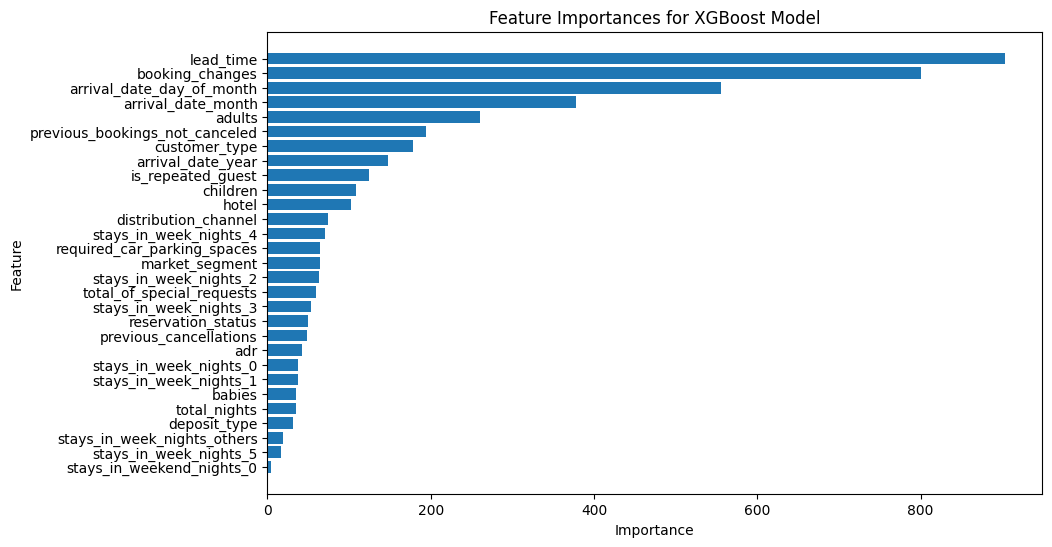

In [1056]:
# Extract feature importances
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')

# Create a dataframe with feature importances
importance_df = pd.DataFrame({'feature': importance.keys(), 'importance': importance.values()})

# Optional: If your features were encoded, create a mapping from encoded names to original names
# Assuming feature_names is a list of original feature names in the same order as the model input
# Example: feature_names = ['age', 'salary', 'education']
# encoded_feature_names = booster.feature_names
# feature_mapping = {encoded_feature_names[i]: feature_names[i] for i in range(len(encoded_feature_names))}

# # Map encoded feature names to original feature names
# importance_df['feature'] = importance_df['feature'].map(feature_mapping)

feature_mapping = {f'f{i}': col for i, col in enumerate(df.drop("is_canceled", axis=1).columns)}
importance_df['feature'] = importance_df['feature'].map(feature_mapping)

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


## Support Vector Machine

In [1057]:
# svc = SVC(kernel='linear')  # Example with linear kernel; you can also use 'rbf' for radial basis function
# svc.fit(X_train, y_train)

# # Make predictions
# predictions = svc.predict(X_test)

# accuracy_s = accuracy_score(y_test, predictions)

# # Evaluate model
# print(confusion_matrix(y_test, predictions))
# print("Accuracy =", accuracy_score(y_test, predictions))
# print("Precision =", precision_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
# print("Recall =", recall_score(y_test, predictions, average='weighted'))  # Use weighted average for multiclass
# print("F1 Score =", f1_score(y_test, predictions, average='weighted'))

In [1058]:
# Make predictions
# predictions = svc.predict(X_val)

# accuracy_sv = accuracy_score(y_val, predictions)

# # Evaluate model
# print(confusion_matrix(y_val, predictions))
# print("Accuracy =", accuracy_score(y_val, predictions))
# print("Precision =", precision_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
# print("Recall =", recall_score(y_val, predictions, average='weighted'))  # Use weighted average for multiclass
# print("F1 Score =", f1_score(y_val, predictions, average='weighted')) 

In [1061]:
X_train

array([[ 1.50271102,  0.16564044, -1.46924304, ..., -0.0929157 ,
        -0.10913569, -0.04760363],
       [ 1.50271102, -0.24499311, -1.46924304, ..., -0.0929157 ,
        -0.10913569, -0.04760363],
       [ 1.50271102, -0.24499311, -1.46924304, ..., -0.0929157 ,
        -0.10913569, -0.04760363],
       ...,
       [ 1.50271102, -0.17199159,  0.40508616, ..., -0.0929157 ,
        -0.10913569, -0.04760363],
       [-0.66546394,  0.41202057,  2.27941535, ..., -0.0929157 ,
        -0.10913569, -0.04760363],
       [-0.66546394,  1.17853652,  0.40508616, ..., -0.0929157 ,
        -0.10913569, -0.04760363]])

## Model Comparison for Test

                      Model      Score
0       Logistic Regression  55.151041
1                       KNN  71.042493
2  Decision Tree Classifier  58.244458
3  Random Forest Classifier  76.793791
4                   XgBoost  43.330169
5               Naive Bayes  61.622648


C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_14948\2966155743.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x='Model', y='Score', data=models , palette= 'cool')


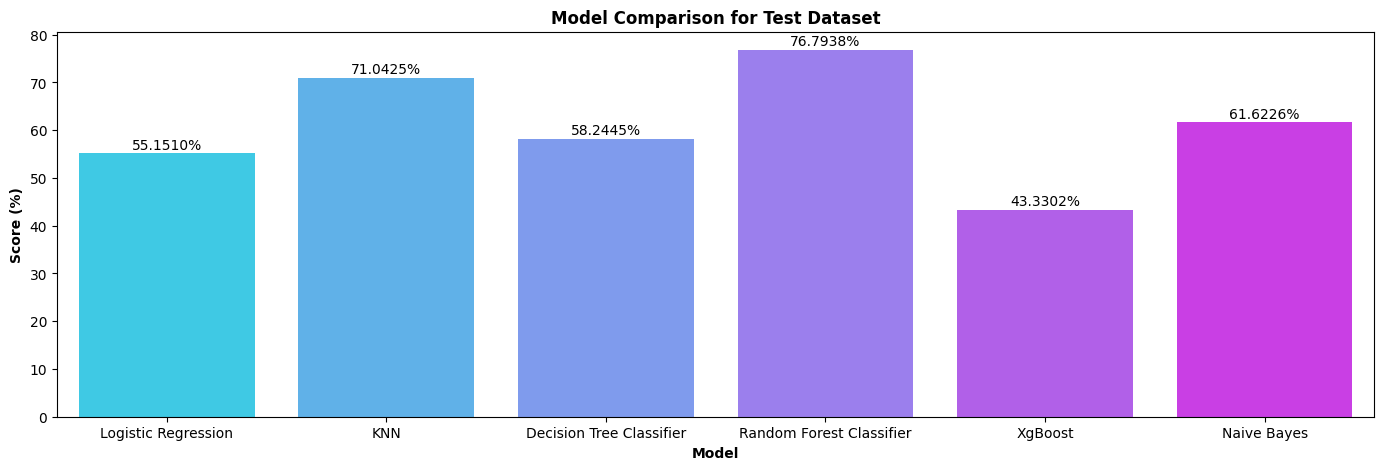

In [78]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
                'XgBoost', 'Naive Bayes'],
    'Score' : [accuracy_c, accuracy_k, accuracy_d, accuracy_r, accuracy_x,  accuracy_n]
})


models.sort_values(by = 'Score', ascending = False)

models['Score'] = models['Score'] * 100

print(models)

plt.figure(figsize=(17,5))
plots = sns.barplot(x='Model', y='Score', data=models , palette= 'cool')
plt.title('Model Comparison for Test Dataset', weight = 'bold')
plt.xlabel('Model', weight = 'bold')
plt.ylabel('Score (%)', weight = 'bold')
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():.4f}%', 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', size=10, xytext=(0, 6), textcoords='offset points')

## Model Comparison for Validation

                      Model      Score
0       Logistic Regression  52.825553
1                       KNN  70.102747
2  Decision Tree Classifier  63.530266
3  Random Forest Classifier  73.481126
4                   XgBoost  40.495868
5               Naive Bayes  64.205941


C:\Users\Mokshda Sharma\AppData\Local\Temp\ipykernel_14948\2046651218.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x='Model', y='Score', data=models , palette= 'coolwarm')


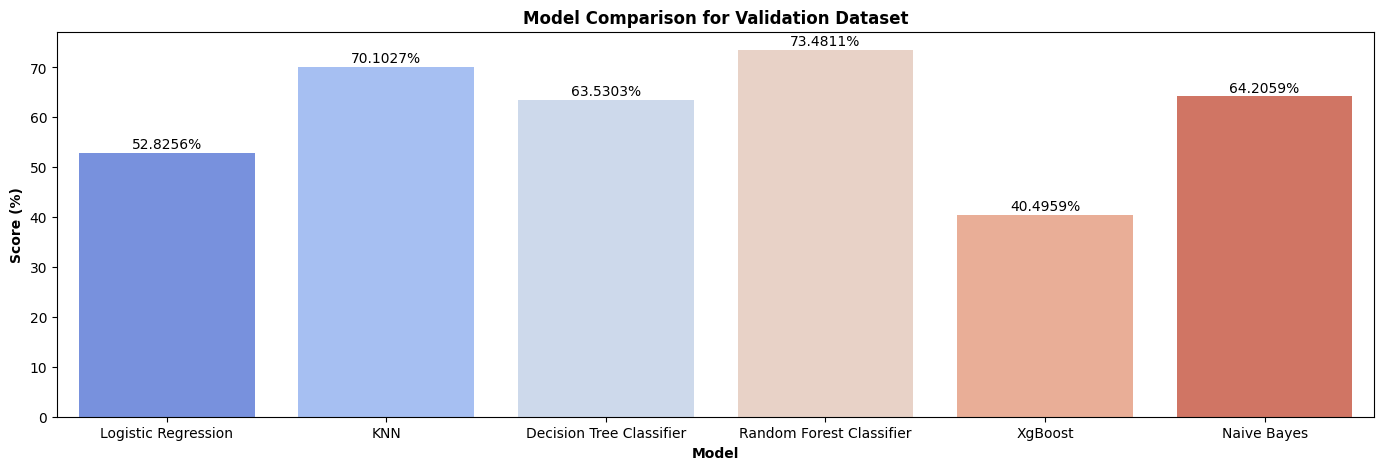

In [79]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
                'XgBoost', 'Naive Bayes'],
    'Score' : [accuracy_cv, accuracy_kv, accuracy_dv, accuracy_rv, accuracy_xv, accuracy_nv]
})

models['Score'] = models['Score'] * 100

models.sort_values(by = 'Score', ascending = False)

print(models)

plt.figure(figsize=(17,5))
plots = sns.barplot(x='Model', y='Score', data=models , palette= 'coolwarm')
plt.title('Model Comparison for Validation Dataset', weight = 'bold')
plt.xlabel('Model', weight = 'bold')
plt.ylabel('Score (%)', weight = 'bold')
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():.4f}%', 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', size=10, xytext=(0, 6), textcoords='offset points')